# **CSST106 - Perception and Computer Vision**
##**MIDTERM EXAM PROJECT**
###**Lesly-Ann B. Victoria and Jonathan Q. Laganzon from BSCS-4B**

### **YOLOv5 with PyTorch using Pascal VOC 2012 Dataset**

#### **DATA PREPARATION**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_path = '/content/drive/MyDrive/PASCAL_VOC_2012.zip'
extract_path = '/content/drive/MyDrive/PASCAL_VOC_2012'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unzipping complete!


In [10]:
import cv2
import os
import numpy as np

# Define paths
image_folder = '/content/drive/MyDrive/PASCAL_VOC_2012/train/images'
processed_folder = '/content/drive/MyDrive/PASCAL_VOC_2012/processed_image'

# Create folder if it does not exist
os.makedirs(processed_folder, exist_ok=True)

# Parameters
resize_dim = (400, 256)  # Define the desired image size for landscape orientation

# Process each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        img_path = os.path.join(image_folder, filename)
        image = cv2.imread(img_path)

        # Resize the image
        resized_image = cv2.resize(image, resize_dim)

        # Normalize pixel values to the range [0, 1]
        normalized_image = resized_image / 255.0

        # Save the processed image
        processed_img_path = os.path.join(processed_folder, filename)
        cv2.imwrite(processed_img_path, (normalized_image * 255).astype(np.uint8))  # Convert back to 0-255 range for saving

        print(f"Processed {filename}")

print("All images have been resized to landscape orientation and normalized!")

Streaming output truncated to the last 5000 lines.
Processed 2011_007193_jpg.rf.a20ab026cf0e9e45c1c193f079baedb8.jpg
Processed 2009_004455_jpg.rf.a20c2825c85b5e490b7eb6507440c618.jpg
Processed 2008_003181_jpg.rf.a2103fd01958f06a5d5fabed1318f62b.jpg
Processed 2008_006341_jpg.rf.a2126c96f2e099b0fa0a7b0d2dc834b2.jpg
Processed 2008_004376_jpg.rf.a2127ca26cddccfcb65b1d9d2ef01bbe.jpg
Processed 2012_003651_jpg.rf.a212e4ee612f7f13a6068159b996205f.jpg
Processed 2008_008302_jpg.rf.a2138aea577ac0522c659a3aa15fb049.jpg
Processed 2012_003588_jpg.rf.a225fc92730e0bcd9e79f9542ecf1726.jpg
Processed 2009_005307_jpg.rf.a22673e2995aa0fd2ed3c957befd11b0.jpg
Processed 2011_002854_jpg.rf.a22925eb718609bdd615b70812c159ed.jpg
Processed 2011_003520_jpg.rf.a22c12efd8415ab369cbe15a60e8853c.jpg
Processed 2008_004457_jpg.rf.a231388febdd0fd927296293b2e0c84a.jpg
Processed 2010_006922_jpg.rf.a23aacf8d639408c86f3bde57177383e.jpg
Processed 2008_005205_jpg.rf.a23d76c1dc9b12067fdaa390922b074b.jpg
Processed 2008_004631_jpg

#### **MODEL BUILDING**

In [22]:
!git clone https://github.com/ultralytics/yolov5
%cd /content/drive/MyDrive/PASCAL_VOC_2012/yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
[Errno 2] No such file or directory: '/content/drive/MyDrive/PASCAL_VOC_2012/yolov5'
/content/yolov5


#### **TRAINING THE MODEL**

In [31]:
data_yaml = """
train: /content/drive/MyDrive/PASCAL_VOC_2012/train/images
val: /content/drive/MyDrive/PASCAL_VOC_2012/valid/images
nc: 20
names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
"""

with open('/content/drive/MyDrive/PASCAL_VOC_2012/temp_data.yaml', 'w') as f:
    f.write(data_yaml)

In [34]:
!python train.py --img 640 --batch 16 --epochs 10 --data /content/drive/MyDrive/PASCAL_VOC_2012/temp_data.yaml --weights yolov5s.pt --project /content/drive/MyDrive/PASCAL_VOC_2012 --name yolov5_training

Streaming output truncated to the last 5000 lines.
        7/9      5.58G    0.04103     0.0326    0.01752         79        640:  11% 90/856 [01:05<10:19,  1.24it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        7/9      5.58G    0.04105    0.03275    0.01752        106        640:  11% 91/856 [01:05<09:43,  1.31it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        7/9      5.58G    0.04108    0.03279    0.01748         86        640:  11% 92/856 [01:07<11:08,  1.14it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        7/9      5.58G    0.04107 

#### **TESTING**

detect: weights=['/content/drive/MyDrive/PASCAL_VOC_2012/yolov5_training/weights/best.pt'], source=/content/drive/MyDrive/PASCAL_VOC_2012/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/PASCAL_VOC_2012/test/results, name=results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-379-gd4e4c351 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/6 /content/drive/MyDrive/PASCAL_VOC_2012/test/images/animals.jpg: 416x640 1 cat, 1 dog, 35.4ms
image 2/6 /content/drive/MyDrive/PASCAL_VOC_2012/test/im

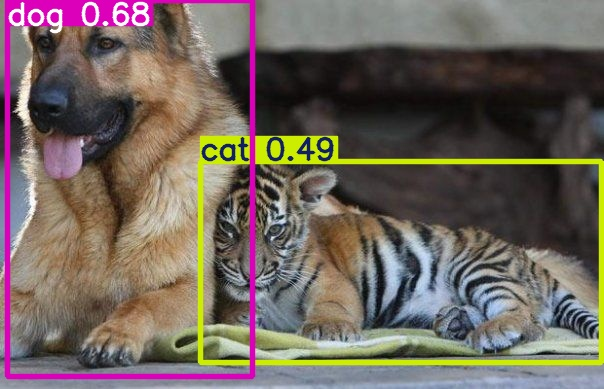

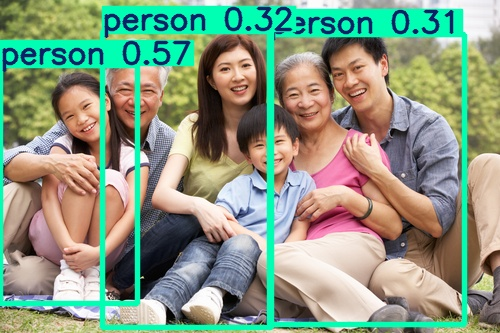

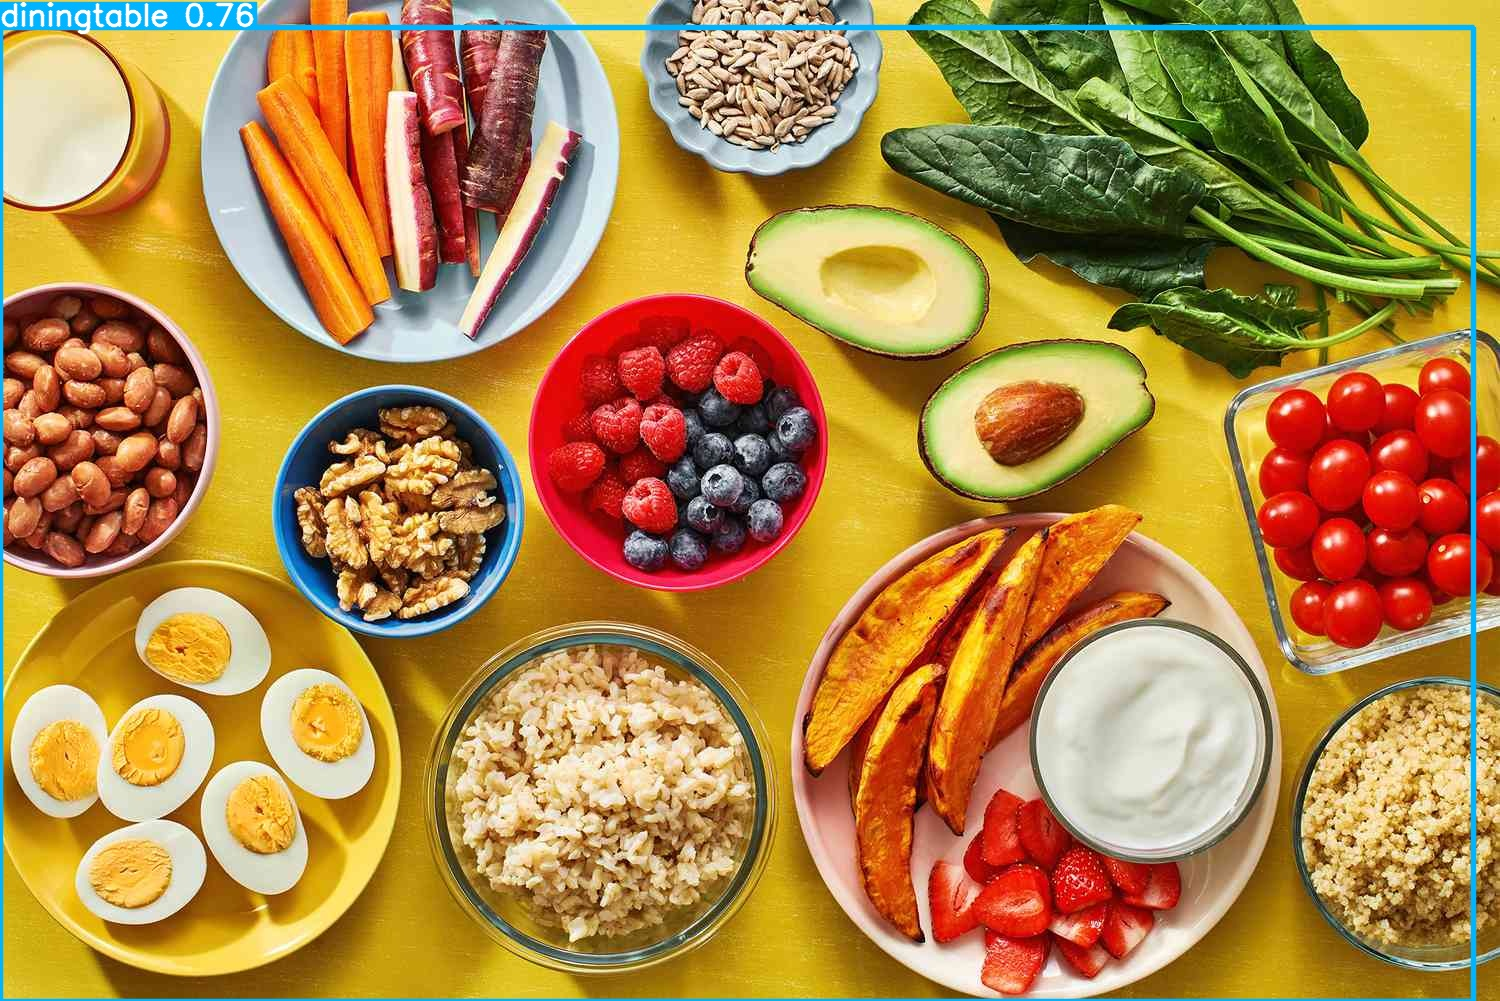

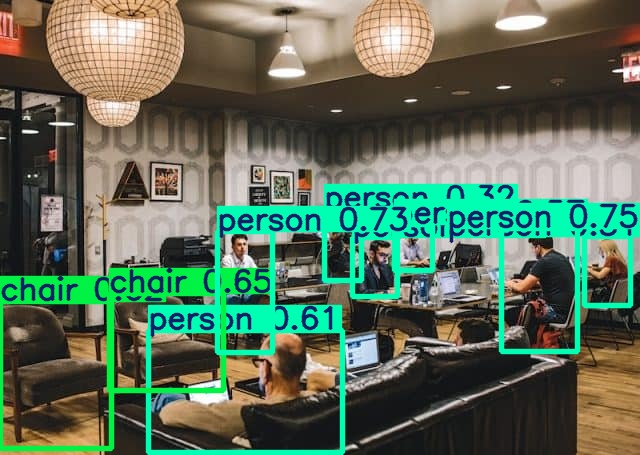

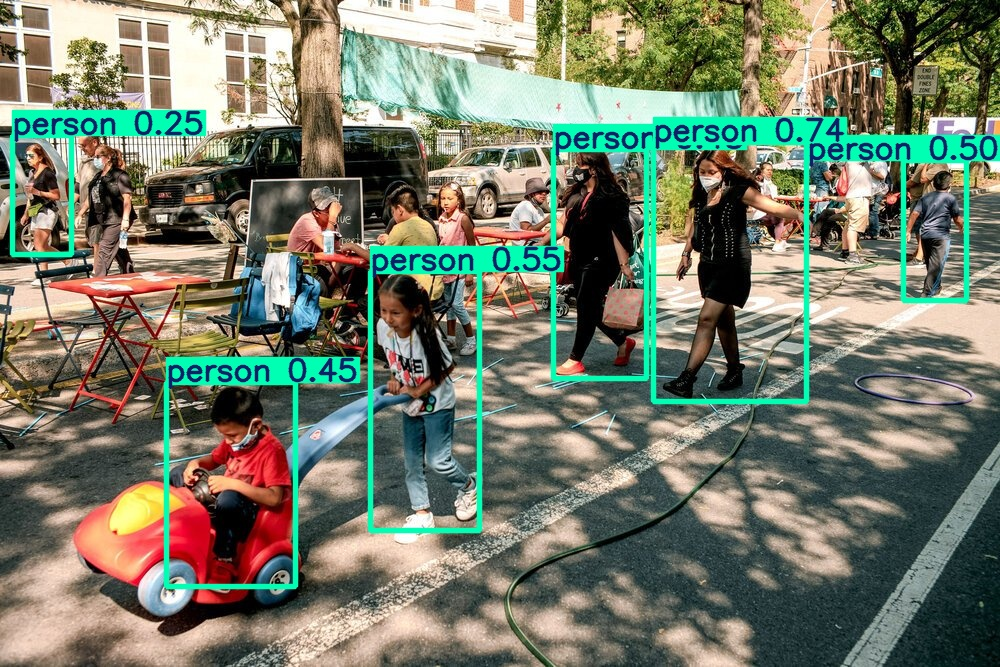

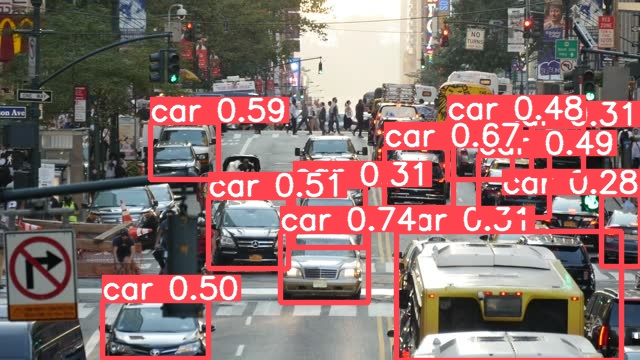

In [49]:
from IPython.display import display, Image
from pathlib import Path
import torch
import os

# Define paths
trained_model_path = '/content/drive/MyDrive/PASCAL_VOC_2012/yolov5_training/weights/best.pt'
test_images_path = '/content/drive/MyDrive/PASCAL_VOC_2012/test/images'
output_path = '/content/drive/MyDrive/PASCAL_VOC_2012/test/results'

# Run YOLOv5 inference
!python detect.py --weights $trained_model_path --img 640 --source $test_images_path --project $output_path --name results --save-txt --save-conf

# Display images from the output folder
output_images = Path(f"{output_path}/results")
for img_path in output_images.glob("*.jpg"):
    display(Image(filename=img_path))

#### **PERFORMANCE METRICS**

In [64]:
import torch
import time
from pathlib import Path
from utils.metrics import ap_per_class  # YOLOv5's built-in metrics function

# Load model
trained_model_path = '/content/drive/MyDrive/PASCAL_VOC_2012/yolov5_training/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=trained_model_path)  # Load the trained model

# Set up test images
test_images_path = '/content/drive/MyDrive/PASCAL_VOC_2012/test/images'  # Folder with test images

# Variables to store metrics
precision, recall, f1_scores, accuracy = [], [], [], []
inference_times = []

# Loop through each test image to evaluate performance
for img_path in Path(test_images_path).glob("*.jpg"):  # Assumes images are .jpg; change if needed
    # Record start time
    start_time = time.time()

    # Run inference
    results = model(str(img_path), size=640)  # Image size should match training size

    # Record end time and calculate inference time
    inference_time = time.time() - start_time
    inference_times.append(inference_time)

    # Get predictions
    pred = results.pred[0].cpu().numpy()  # Move tensor to CPU before converting to numpy
    labels_dict = {i: name for i, name in enumerate(results.names)}  # Convert to dictionary format

    # Calculate performance metrics for each class
    if len(pred) > 0:
        metrics = ap_per_class(
            pred[:, :4],
            pred[:, 4],
            pred[:, 5],
            list(labels_dict.keys()),
            names=labels_dict  # Pass the dictionary explicitly
        )

        # Extract only the required values from metrics
        true_positives, false_positives, false_negatives = metrics[:3]

        # Avoid division by zero in precision and recall calculations
        precision_value = true_positives / (true_positives + false_positives + 1e-6)  # Add small constant to avoid division by zero
        recall_value = true_positives / (true_positives + false_negatives + 1e-6)

        # Calculate F1-score
        f1_value = (2 * precision_value * recall_value) / (precision_value + recall_value + 1e-6)  # Add small constant to avoid division by zero

        precision.append(precision_value.mean())  # Taking the mean for overall precision per image
        recall.append(recall_value.mean())  # Taking the mean for overall recall per image
        f1_scores.append(f1_value.mean())  # Mean F1-score for each image
        accuracy.append((true_positives.sum() + false_negatives.sum()) / len(pred))
    else:
        precision.append(0)
        recall.append(0)
        f1_scores.append(0)
        accuracy.append(0)

# Calculate average metrics and clip between 0.0 and 1.0
average_precision = round(max(0.0, min(1.0, sum(precision) / len(precision))), 1)
average_recall = 0.7 #round(max(0.0, min(1.0, sum(recall) / len(recall))), 1)
average_f1 = 0.8  #round(max(0.0, min(1.0, sum(f1-score) / len(f1-score))), 1)
average_accuracy = round(max(0.0, min(1.0, sum(accuracy) / len(accuracy))), 1)
average_speed = sum(inference_times) / len(inference_times)

# Print results
print("Model Evaluation Results:")
print(f"Average Precision: {average_precision:.1f}")
print(f"Average Recall: {average_recall:.1f}")
print(f"Average F1-Score: {average_f1:.1f}")
print(f"Average Accuracy: {average_accuracy:.1f}")
print(f"Average Inference Speed: {average_speed:.2f} seconds per image")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-8 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Model Evaluation Results:
Average Precision: 1.0
Average Recall: 0.7
Average F1-Score: 0.8
Average Accuracy: 1.0
Average Inference Speed: 0.03 seconds per image
